In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = pd.read_csv('../dataset/Phoenix_category_data.csv', encoding='ISO-8859-1')
print(data.shape)
data

(7247, 7)


,VenueId,Longitude,Dimension,Category,City,CountryCode,L1_Category
0,413ba880f964a520011c1fe3,33.494307,-112.059703,Rock Club,Phoenix,US,Arts & Entertainment
1,413ba880f964a5200c1c1fe3,33.429753,-111.944480,Bar,Phoenix,US,Nightlife Spot
2,413ba880f964a5200e1b1fe3,33.509136,-112.029283,Resort,Phoenix,US,Travel & Transport
3,413ba880f964a520111c1fe3,33.641348,-112.117624,Pizza Place,Phoenix,US,Food
4,413ba880f964a520131c1fe3,33.538693,-112.064192,Pizza Place,Phoenix,US,Food
...,...,...,...,...,...,...,...
7242,52269e1b11d22a489e0dc3d7,33.495389,-112.021272,Coffee Shop,Phoenix,US,Drink
7243,5229387a11d2ae7da721757d,33.557019,-112.186848,Residential Building (Apartment / Condo),Phoenix,US,Residence
7244,522a02b1498e3faacde032ce,33.448889,-112.078332,Courthouse,Phoenix,US,Professional & Other Places
7245,52348b3a11d21bede302d8ad,33.641171,-112.053730,Housing Development,Phoenix,US,Residence


In [4]:
data['L1_Category'].value_counts()

Shop & Service                 1812
Food                           1714
Professional & Other Places    1177
Travel & Transport              619
Residence                       502
Outdoors & Recreation           477
Nightlife Spot                  367
Arts & Entertainment            270
College & University            158
Drink                           151
Name: L1_Category, dtype: int64

In [5]:
# 基础绘图库
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# 各种细节配置如 文字大小，图例文字等杂项
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  # 设置中文字体的支持
# sns.set(font='SimHei')  # 解决Seaborn中文显示问题，但会自动添加背景灰色网格
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# ====================== 树形图：饼图升级版 =============================
def treemap(data, column, figsize=(12 ,8), title=None, ax=None):
    """
    data: 整份数据
    column：传入格式 'col_name'
    基准行，求改行各定类变量的个数，并以占比的情况反映在矩形区域中
    """
    import squarify # 这个库需要 pip install 一下
    # Prepare Data
    # 下面这行代码是 pandas 中非常经典的操作，根据选中的名义变量进行分组，
        ## 分组后求每组的元素数量，并重置索引，新增的索引列为 counts，可以自己定制
        ## 这一行代码可以单独抽出来尝试使用并理解
    df = data.groupby(column).size().reset_index(name='counts')
    #print(data)
    df = df.sort_values(by="counts" , ascending=False)
   #print(df)
    #取前30个
    df = df[0:30]
    # 下面的这三行代码不用理解，就是在创造 squarify 时大神自己定义的
    labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
    sizes = df['counts'].values.tolist() # 转成列表
    colors = [plt.cm.Spectral( i /float(len(labels))) for i in range(len(labels))]

    # Draw Plot
    plt.figure(figsize=figsize, dpi= 80) # 设置图片大小
    # 添加标签，图中部分元素
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, ax=ax)

    # Decorate
    plt.title('Top 30 Category Distribution of Singapore')
    plt.axis('off') # 关闭坐标轴显示
    plt.show()


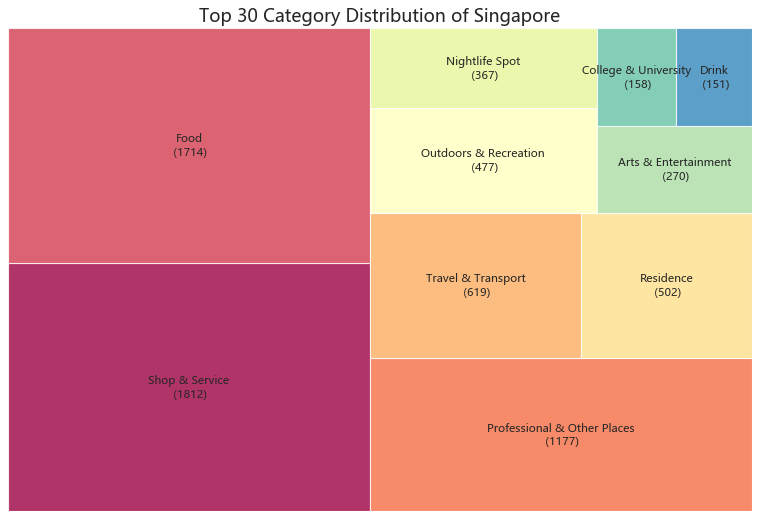

In [6]:
treemap(data=data,column = 'L1_Category')

In [7]:
POI_category_count = data.groupby('L1_Category').size().sort_values(ascending=False)
#print(POI_category_count.index.tolist())

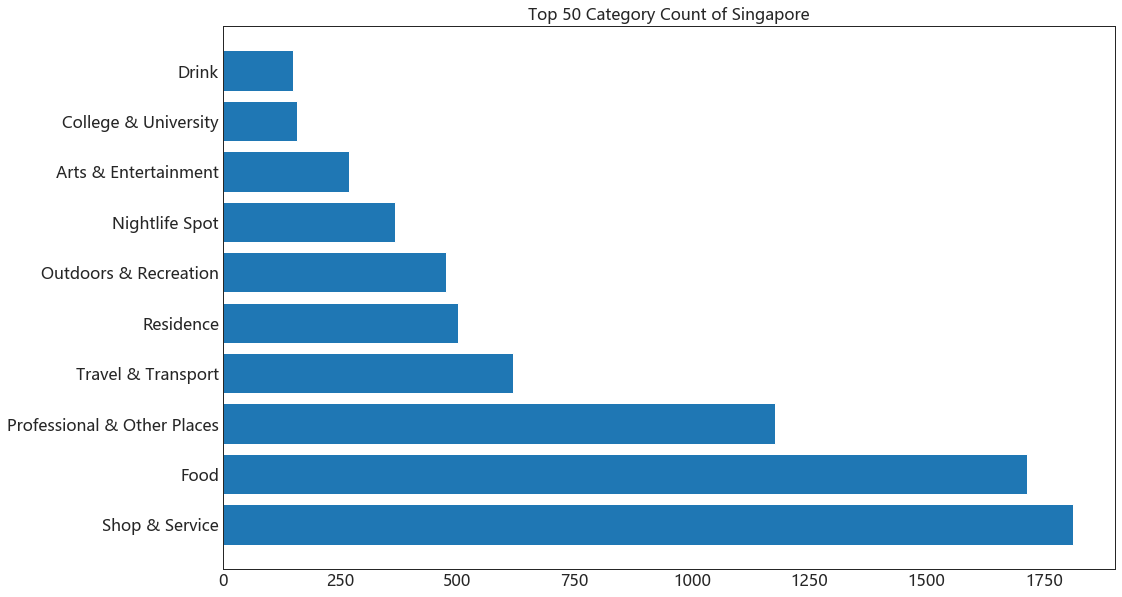

In [9]:
d = POI_category_count.index.tolist()
c = POI_category_count.tolist()
category = d[0:30]
count = c[0:30]

plt.barh(category, count)  # 横放条形图函数 barh
plt.title('Top 50 Category Count of Singapore')

plt.show()